In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!ls

data				misc		   README.md	     task2.csv
images				ML_tutorial.ipynb  requirements.txt
Machine-Learning-in-Healthcare	ML_tutorial.pdf    task1.csv


In [ ]:
%cd Machine-Learning-in-Healthcare

/content/Machine-Learning-in-Healthcare/Machine-Learning-in-Healthcare


In [ ]:
!ls


data	misc		   ML_tutorial.pdf  requirements.txt  task2.csv
images	ML_tutorial.ipynb  README.md	    task1.csv


In [ ]:
df = pd.read_csv('dataset_1.csv')


In [ ]:
df.dtypes


LOS                           float64
blood                         float64
circulatory                   float64
congenital                    float64
digestive                     float64
endocrine                     float64
genitourinary                 float64
infectious                    float64
injury                        float64
mental                        float64
misc                          float64
muscular                      float64
neoplasms                     float64
nervous                       float64
pregnancy                     float64
prenatal                      float64
respiratory                   float64
skin                          float64
GENDER                        float64
ICU                           float64
NICU                          float64
ADM_ELECTIVE                    int64
ADM_EMERGENCY                   int64
ADM_NEWBORN                     int64
ADM_URGENT                      int64
INS_Government                  int64
INS_Medicaid

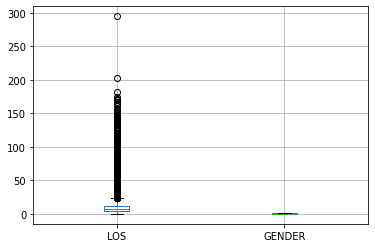

In [ ]:
df.boxplot(column=['LOS','GENDER'], return_type='axes');

In [ ]:
!ls

ADMISSIONS.csv	DIAGNOSES_ICD.csv  ICUSTAYS.csv  PATIENTS.csv


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


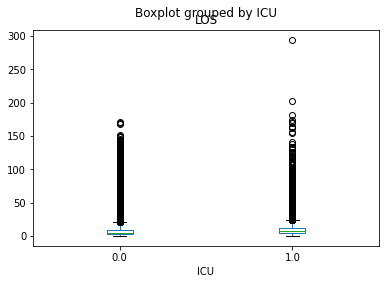

In [ ]:
df.boxplot(by ='ICU', column =['LOS'], grid = False) 

In [ ]:
df.nunique()

LOS                           24020
blood                             7
circulatory                      17
congenital                       10
digestive                        12
endocrine                        12
genitourinary                     8
infectious                        8
injury                           23
mental                           12
misc                              9
muscular                          8
neoplasms                        11
nervous                           9
pregnancy                        14
prenatal                         17
respiratory                      10
skin                              9
GENDER                            2
ICU                               2
NICU                              2
ADM_ELECTIVE                      2
ADM_EMERGENCY                     2
ADM_NEWBORN                       2
ADM_URGENT                        2
INS_Government                    2
INS_Medicaid                      2
INS_Medicare                

In [ ]:
df.describe()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
count,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000
mean,10.228510,0.370711,2.260007,0.077121,0.617591,1.175030,0.503968,0.308502,2.362698,0.428963,0.371358,0.213943,0.219958,0.376727,0.012893,0.483688,0.683073,0.148794,0.431413,0.823030,0.155260,0.144993,0.679860,0.152772,0.022376,0.033172,0.105512,0.437232,0.414092,0.009993,0.206125,0.657112,0.136764,0.035464,0.102847,0.039109,0.127417,0.695162,0.230264,0.157572,0.533103,0.079060,0.056136,0.000294,0.412916,0.010052,0.232929,0.188726,0.098948
std,12.461440,0.652278,2.255679,0.357821,1.119265,1.345073,0.845481,0.670549,2.206709,0.856638,0.723226,0.558986,0.661356,0.759707,0.265499,1.396364,1.054149,0.503185,0.495278,0.381647,0.362156,0.352097,0.466535,0.359771,0.147904,0.179087,0.307215,0.496049,0.492569,0.099464,0.404525,0.474679,0.343601,0.184952,0.303762,0.193856,0.333443,0.460343,0.421006,0.364343,0.498908,0.269835,0.230186,0.017141,0.492363,0.099753,0.422702,0.391295,0.298595
min,0.014583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.857639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.583333,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.805556,1.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,294.660417,6.000000,16.000000,11.000000,11.000000,12.000000,7.000000,7.000000,23.000000,11.0000

In [ ]:
LOS = df['LOS'].values
features = df.drop(columns=['LOS'])

In [ ]:
df.isnull().values.sum()

0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))


Training set has 40829 samples.
Testing set has 10208 samples.


In [ ]:
ml_models = [LinearRegression(),]

results = {}

for model in ml_models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(x_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(x_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

LinearRegression done.


In [ ]:
print('R2 Score')
for i in results.keys():
    print('{} : {}'.format(i,results[i]))

R2 Score
LinearRegression : 0.35051452128519556


In [ ]:
from sklearn.metrics import accuracy_score





In [ ]:
print(df.dtypes.astype(str).value_counts())

int64      28
float64    21
dtype: int64
